# Vehicle Detection and Tracking Project 

Talk about the goal of the project

## Load Packages

In [1]:
# Import functions library for the project
import importlib
import defs
defs = importlib.reload(defs)

In [2]:
# General system level packages
import sys
import os
import time
import glob

# For numerical and image processing
import numpy as np
import cv2

# For images and plotting 
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# For image processing 
from scipy.ndimage.measurements import label

# For machine learning tasks such as standardization, splitting and linear SVM classification
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVC

# For processing video files 
from moviepy.editor import VideoFileClip
import io
import base64
from IPython.display import HTML

# Inline plotting 
%matplotlib inline

## Load Images

In [3]:
# Since we will be identifying cars using a classification algorithm, 
# we need to train the classifier using car and non-car images. 
# These images are located in two different folders 'vehicles' and 'non-vehicles' with subfolders.
# These example images come from a combination of the GTI vehicle image database, 
# the KITTI vision benchmark suite, and examples extracted from the project video itself.
# We can use glob package to get various png images under different subfolders using a pattern 

car_image_paths = glob.glob('vehicles/*/*.png')
notcar_image_paths = glob.glob('non-vehicles/*/*.png')

# Now let's see the total number of images we have in each class 
print('Number of Vehicle Images found: ', len(car_image_paths))
print('Number of Non-Vehicle Images found: ', len(notcar_image_paths))

Number of Vehicle Images found:  8792
Number of Non-Vehicle Images found:  8968


## Define Helper Functions

Describe functions here 

## Visualize Data

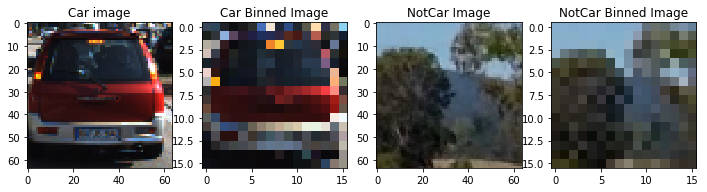

In [4]:
# Choose one random car and one non-car indices 
car_ind = np.random.randint(0, len(car_image_paths))
notcar_ind = np.random.randint(0, len(notcar_image_paths))

# Read in car/not-car images 
car_image = mpimg.imread(car_image_paths[car_ind])
notcar_image = mpimg.imread(notcar_image_paths[notcar_ind])

# Define feature parameters
color_space = 'RGB' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 6
pix_per_cell = 8
cell_per_block = 2
hog_channel = 0  # can be 0, 1, 2, or 'ALL'
spatial_size = (16, 16)  # Spatial binning dimensions 
hist_bins = 16  # Number of histogram bins
spatial_feat = True  # Get spatial features on/off
hist_feat = True  # Get color histogram features on/off
hog_feat = True  # Get HOG features on/off

# Demonstrate the effect of spatial binnning 
car_binning = defs.bin_spatial(car_image, spatial_size)
notcar_binning = defs.bin_spatial(notcar_image, spatial_size)

images = [car_image, car_binning.reshape(spatial_size[0], spatial_size[1], 3),
          notcar_image, notcar_binning.reshape(spatial_size[0], spatial_size[1], 3)]
titles = ['Car image', 'Car Binned Image', 'NotCar Image', 'NotCar Binned Image']
fig = plt.figure(figsize = (12, 3)) 
defs.visualize(fig, 1, 4, images, titles)

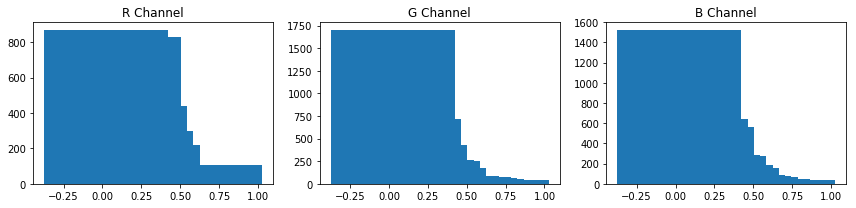

In [5]:
# Demonstrate the effect of color histograms 
car_hist, bin_centers, car_chn1_hist, car_chn2_hist, car_chn3_hist = defs.color_hist(car_image, hist_bins)
notcar_hist, bin_centers, notcar_chn1_hist, notcar_chn2_hist, notcar_chn3_hist = defs.color_hist(notcar_image, hist_bins)

defs.color_histogram(color_space, bin_centers, car_chn1_hist, car_chn2_hist, car_chn3_hist)

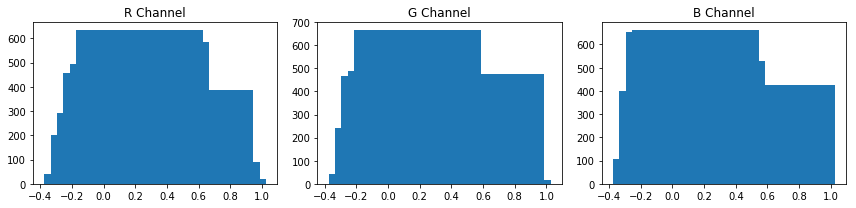

In [6]:
defs.color_histogram(color_space, bin_centers, notcar_chn1_hist, notcar_chn2_hist, notcar_chn3_hist)

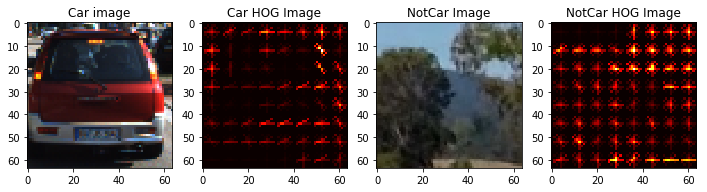

In [7]:
car_features, car_hog_image = defs.single_img_features(car_image, color_space = color_space, 
                                                       spatial_size = spatial_size, hist_bins = hist_bins, 
                                                       orient = orient, pix_per_cell = pix_per_cell, 
                                                       cell_per_block = cell_per_block, hog_channel = hog_channel,
                                                       spatial_feat = spatial_feat, hist_feat = hist_feat, 
                                                       hog_feat = hog_feat, vis = True)

notcar_features, notcar_hog_image = defs.single_img_features(notcar_image, color_space = color_space, 
                                                             spatial_size = spatial_size, hist_bins = hist_bins, 
                                                             orient = orient, pix_per_cell = pix_per_cell, 
                                                             cell_per_block = cell_per_block, hog_channel = hog_channel,
                                                             spatial_feat = spatial_feat, hist_feat = hist_feat, 
                                                             hog_feat = hog_feat, vis = True)

images = [car_image, car_hog_image, notcar_image, notcar_hog_image]
titles = ['Car image', 'Car HOG Image', 'NotCar Image', 'NotCar HOG Image']
fig = plt.figure(figsize = (12, 3))
defs.visualize(fig, 1, 4, images, titles)

# When car and non-car images are compared with their HOG feature images, it becomes obvious that 
# HOG method captures some of the distinct features of the car 
# Consider an image showing the back of the car, vectors shows that HOG can capture the licence plate, 
# car boundary, rear window, lights
# The two parameters pix_per_cell and cell_per_block are selected based on the size of the features 
# you have in the image

## Train Classifier 

In [ ]:
# Define feature parameters
color_space = 'YCrCb' # Can be RGB, HSV, LUV, HLS, YUV, YCrCb
orient = 9
pix_per_cell = 8 # size of the features we are looking in the images 
cell_per_block = 2 # helps with the normalization - lighting, shadows
hog_channel = 'ALL'  # can be 0, 1, 2, or 'ALL' 
spatial_size = (32, 32)  # Spatial binning dimensions 
hist_bins = 32  # Number of histogram bins
spatial_feat = True  # Get spatial features on/off
hist_feat = True  # Get color histogram features on/off
hog_feat = True  # Get HOG features on/off

t = time.time()

n_samples = 1000
random_idxs = np.random.randint(0, len(car_image_paths), n_samples)
# test_cars = np.array(car_image_paths)[random_idxs]
# test_notcars = np.array(notcar_image_paths)[random_idxs]

test_cars = car_image_paths
test_notcars = notcar_image_paths

car_features = defs.extract_features(test_cars, color_space = color_space,
                                     spatial_size = spatial_size, hist_bins = hist_bins,
                                     orient = orient, pix_per_cell = pix_per_cell,
                                     cell_per_block = cell_per_block, hog_channel = hog_channel,
                                     spatial_feat = spatial_feat, hist_feat = hist_feat, hog_feat = hog_feat)

notcar_features = defs.extract_features(test_notcars, color_space = color_space,
                                        spatial_size = spatial_size, hist_bins = hist_bins,
                                        orient = orient, pix_per_cell = pix_per_cell,
                                        cell_per_block = cell_per_block, hog_channel = hog_channel,
                                        spatial_feat = spatial_feat, hist_feat = hist_feat, hog_feat = hog_feat)

print(round(time.time() - t, 2), 'Seconds to compute the features\n')

X = np.vstack((car_features, notcar_features)).astype(np.float64) # Standard Scaler expects float 64
y = np.hstack((np.ones(len(car_features)), np.zeros(len(notcar_features))))

# Normalize Data
# We have spatial, color histogram and HOG features in the same feature set
# It is best to bring them to equal scale to avoid one feature to dominate due to scale differences
# Fit a per-column scaler
X_scaler = StandardScaler().fit(X)
# Use the scaler to transform X 
scaled_X = X_scaler.transform(X)

# Split the data into train and test sets
rand_state = np.random.randint(0, 100)
X_train, X_test, y_train, y_test = train_test_split(scaled_X, y, test_size = 0.2, random_state = rand_state)

print('Using:', orient, 'orientations', pix_per_cell, 'pixels per cell and', 
      cell_per_block, 'cells per block', hist_bins, 'histogram bins, and', spatial_size, 'spatial sampling\n')
print('Feature vector length:', len(X_train[0]), '\n')

# Use linear SVC
svc = LinearSVC()

# Check the training time for the SVC
t = time.time()

svc.fit(X_train, y_train)

print(round(time.time() - t, 2), 'Seconds to train SVC..\n')

# Check the score of the SVC
svc_score = svc.score(X_test, y_test)

print('Test accuracy of SVC = ', round(svc_score, 4), '\n')

103.58 Seconds to compute the features

Using: 9 orientations 8 pixels per cell and 2 cells per block 32 histogram bins, and (32, 32) spatial sampling

Feature vector length: 8460 



In [ ]:
example_images = glob.glob('test_images/test*.jpg')
images = []
titles = []
x_start_stop = [None, None]
y_start_stop = [400, 656]  # Min and max in y to search in slide_window()
overlap = 0.5
window_size_small = 48
window_size_medium = 64
window_size_large = 128
viz = False

for img_path in example_images:
    print(img_path)
    t1 = time.time()
    img = mpimg.imread(img_path)
    draw_img = np.copy(img)
    img = img.astype(np.float32) / 255  # we developed the pipeline for png images the ranges for it 0-1
    print(np.min(img), np.max(img))
    
    windows_small = defs.slide_window(img, x_start_stop = x_start_stop, y_start_stop = y_start_stop,
                                      xy_window = (window_size_small, window_size_small),
                                      xy_overlap = (overlap, overlap))
    
    windows_medium = defs.slide_window(img, x_start_stop = x_start_stop, y_start_stop = y_start_stop,
                                       xy_window = (window_size_medium, window_size_medium),
                                       xy_overlap = (overlap, overlap))
        
    windows_large = defs.slide_window(img, x_start_stop = x_start_stop, y_start_stop = y_start_stop,
                                      xy_window = (window_size_large, window_size_large),
                                      xy_overlap = (overlap, overlap))
    
    windows = windows_small + windows_medium + windows_large
    
    hot_windows = defs.search_windows(img, windows, svc, X_scaler, color_space = color_space,
                                      spatial_size = spatial_size, hist_bins = hist_bins, 
                                      orient = orient, pix_per_cell = pix_per_cell, 
                                      cell_per_block = cell_per_block, hog_channel = hog_channel, 
                                      spatial_feat = spatial_feat, hist_feat = hist_feat, hog_feat = hog_feat)
    
    window_img = defs.draw_boxes(draw_img, hot_windows, color = (0, 0, 255), thick = 6)
    images.append(window_img)
    titles.append('')
    print(round(time.time() - t1, 2), 'seconds to process one image searching', len(windows), 'windows')

fig = plt.figure(figsize = (12, 12), dpi = 300)
defs.visualize(fig, 3, 2, images, titles)

In [ ]:
out_images = []
out_titles = []
out_maps = []
x_start_stop = [None, None]
y_start_stop = [400, 656]  # Min and max in y to search in slide_window()
scale = 1.5

for img_path in example_images:
    print(img_path)
    img = mpimg.imread(img_path)
    out_img, out_ = defs.find_cars(img = img, scale = scale, x_start_stop = x_start_stop,
                                   y_start_stop = y_start_stop, clf = svc, scaler = X_scaler, 
                                   orient = orient, pix_per_cell = pix_per_cell, 
                                   cell_per_block = cell_per_block, spatial_size = spatial_size, 
                                   hist_bins = hist_bins, color_space = color_space)
    # Get labels using scipy ndimage measurements
    # Gets the s and returns positions of individual contiguous pixels 
    # Basically it determines the clusters of pixel values 
    labels = label(out_)
    # Draw bounding boxes on a copy of the image 
    draw_img = defs.draw_labeled_bboxes(np.copy(img), labels)
    # Add these to the image and title lists to get a figure
    out_images.append(draw_img)
    out_images.append(out_)
    out_titles.append(os.path.split(img_path)[-1].split(".")[0])
    out_titles.append(os.path.split(img_path)[-1].split(".")[0])

fig = plt.figure(figsize = (12, 20), dpi = 300)
defs.visualize(fig, 6, 2, out_images, out_titles)    

In [ ]:
x_start_stop = [None, None]
y_start_stop = [400, 656]  # Min and max in y to search in slide_window()
scale = 1.5

def process_image(img):
    out_img, out_ = defs.find_cars(img = img, scale = scale, x_start_stop = x_start_stop,
                                   y_start_stop = y_start_stop, clf = svc, scaler = X_scaler,
                                   orient = orient, pix_per_cell = pix_per_cell,
                                   cell_per_block = cell_per_block, spatial_size = spatial_size,
                                   hist_bins = hist_bins, color_space = color_space)
    labels = label(out_)
    draw_img = defs.draw_labeled_bboxes(np.copy(img), labels)
    return draw_img

defs.process_video('test_video.mp4', 'test.mp4', process_image)

In [ ]:
video = io.open('test.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data = '''<video width="960" height="540" alt="test_video_car_detection" controls>
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
               </video>'''.format(encoded.decode('ascii')))

In [ ]:
defs.process_video('project_video.mp4', 'test_full.mp4', process_image)

In [ ]:
video = io.open('test_full.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data = '''<video width="960" height="540" alt="full_video_car_detection" controls>
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
               </video>'''.format(encoded.decode('ascii')))

In [ ]:
x_start_stop = [450, None]
y_start_stop = [400, 656]  
scales = [0.75, 1.25, 1.75]
threshold = 0.5

def process_image_two(img):
    heat_maps = []
    for scale in scales:
        out_img, out_ = defs.find_cars(img = img, scale = scale, x_start_stop = x_start_stop,
                                       y_start_stop = y_start_stop, clf = svc, scaler = X_scaler,
                                       orient = orient, pix_per_cell = pix_per_cell,
                                       cell_per_block = cell_per_block, spatial_size = spatial_size,
                                       hist_bins = hist_bins, color_space = color_space)
        heat_maps.append(out_)
    
    avg_ = np.divide(np.sum(heat_maps, axis = 0), len(scales))
    final_ = defs.apply_threshold(avg_, threshold)
    # labels = label(out_)
    # draw_img = draw_labeled_bboxes(np.copy(img), labels)
    # return draw_img
    return final_

for img_path in example_images:
    img = mpimg.imread(img_path)
    himg = process_image_two(img)
    
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (12,3))
    f.subplots_adjust(hspace = 2.0)
    
    ax1.imshow(img)
    ax2.imshow(himg, cmap = 'hot')
    ax3.hist(himg.ravel()[np.flatnonzero(himg)], 50, normed = 1, facecolor = 'green', alpha = 0.75)

plt.show()
plt.close()

### It looks like for thresholding a value around 0.5-1 can be useful 

In [ ]:
x_start_stop = [450, None]
y_start_stop = [400, 656]  
scales = [1.0, 1.5]
threshold = 0.3

def process_image_three(img):
    heat_maps = []
    for scale in scales:
        out_img, out_ = defs.find_cars(img = img, scale = scale, x_start_stop = x_start_stop,
                                       y_start_stop = y_start_stop, clf = svc, scaler = X_scaler,
                                       orient = orient, pix_per_cell = pix_per_cell,
                                       cell_per_block = cell_per_block, spatial_size = spatial_size,
                                       hist_bins = hist_bins, color_space = color_space)
        heat_maps.append(out_)
    
    avg_ = np.divide(np.sum(heat_maps, axis = 0), len(scales))
    final_ = defs.apply_threshold(avg_, threshold)
    labels = label(final_)
    draw_img = defs.draw_labeled_bboxes(np.copy(img), labels)
    return draw_img

defs.process_video("test_video.mp4", "test_out.mp4", process_image_three)

In [ ]:
defs.process_video('project_video.mp4', 'project_out.mp4', process_image_three)

In [ ]:
vidcap = cv2.VideoCapture('project_video.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
    success, image = vidcap.read()
    count += 1

print(count)

In [ ]:
vidcap = cv2.VideoCapture('project_video.mp4')
success,image = vidcap.read()
count = 0
success = True
while success:
    success, image = vidcap.read()
    if not success:
        print('Problem reading frame: ', count)
    if count % 50 == 1:
        cv2.imwrite("test_images/prj_video_frame%d.jpg" % count, image)     # save frame as JPEG file
    count += 1

In [ ]:
some_prj_imgs = glob.glob('test_images/prj_video_frame*.jpg')

x_start_stop = [450, None]
y_start_stop = [400, 656]  
scales = [1.0, 1.5, 2.0]
threshold = 0.5

def process_image_four(img):
    heat_maps = []
    for scale in scales:
        out_img, out_ = defs.find_cars(img = img, scale = scale, x_start_stop = x_start_stop,
                                       y_start_stop = y_start_stop, clf = svc, scaler = X_scaler,
                                       orient = orient, pix_per_cell = pix_per_cell,
                                       cell_per_block = cell_per_block, spatial_size = spatial_size,
                                       hist_bins = hist_bins, color_space = color_space)
        heat_maps.append(out_)
    
    avg_ = np.divide(np.sum(heat_maps, axis = 0), len(scales))
    final_ = defs.apply_threshold(avg_, threshold)
    labels = label(final_)
    draw_img = defs.draw_labeled_bboxes(np.copy(img), labels)
    return final_, draw_img

for img_path in some_prj_imgs:
    img = mpimg.imread(img_path)
    himg, img_box = process_image_four(img)
    
    f, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (15,4))
    f.subplots_adjust(hspace = 2.0)
    
    ax1.imshow(img)
    ax2.imshow(img_box)
    ax3.imshow(himg, cmap = 'hot')
    ax4.hist(himg.ravel()[np.flatnonzero(himg)], 50, normed = 1, facecolor = 'green', alpha = 0.75)

plt.show()
plt.close()

In [ ]:
x_start_stop = [450, None]
y_start_stop = [400, 656]  
scales = [1.0, 1.5, 2.0, 2.5]
threshold = 0.5

global_heatmaps = []
heatmap_sum = np.zeros((720,1280)).astype(np.float64)

In [ ]:
def process_image_five(img):
    
    global global_heatmaps, heatmap_sum
    
    heat_maps = []
    
    for scale in scales:
        out_img, out_heatmap = defs.find_cars(img = img, scale = scale, x_start_stop = x_start_stop,
                                              y_start_stop = y_start_stop, clf = svc, scaler = X_scaler,
                                              orient = orient, pix_per_cell = pix_per_cell,
                                              cell_per_block = cell_per_block, spatial_size = spatial_size,
                                              hist_bins = hist_bins, color_space = color_space)
        heat_maps.append(out_heatmap)
    
    local_heatmap = np.divide(np.sum(heat_maps, axis = 0), len(scales))
    
    global_heatmaps.append(local_heatmap)
    heatmap_sum += local_heatmap
    
    if len(global_heatmaps) > 12:
        oldest_heatmap = global_heatmaps.pop(0)
        heatmap_sum -= oldest_heatmap
        heatmap_sum = np.clip(heatmap_sum, 0.0, 1000000.0)
    
    heatmap_avg = heatmap_sum / len(global_heatmaps)
    
    final_heatmap = defs.apply_threshold(heatmap_avg, threshold)
    labels = label(final_heatmap)
    draw_img = defs.draw_labeled_bboxes(np.copy(img), labels)
    return draw_img

In [ ]:
defs.process_video("test_video.mp4", "test_out.mp4", process_image_five)

In [ ]:
video = io.open('test_out.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data = '''<video width="960" height="540" alt="test_video_car_detection" controls>
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
               </video>'''.format(encoded.decode('ascii')))

In [ ]:
defs.process_video('project_video.mp4', 'project_out.mp4', process_image_five)

In [ ]:
video = io.open('project_out.mp4', 'r+b').read()
encoded = base64.b64encode(video)
HTML(data = '''<video width="960" height="540" alt="test_video_car_detection" controls>
                  <source src="data:video/mp4;base64,{0}" type="video/mp4" />
               </video>'''.format(encoded.decode('ascii')))